In [33]:
import pandas as pd 
import numpy as np

In [34]:
crime_sort = pd.read_hdf('../data/crime.h5', 'crime') \
 .set_index('REPORTED_DATE') \
 .sort_index()

In [35]:
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [36]:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()

In [37]:
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [38]:
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [39]:
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [49]:
crime_quarterly

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


In [40]:
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q')) ['IS_CRIME', 'IS_TRAFFIC'].sum()

<ipython-input-40-8812365b8f81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q')) ['IS_CRIME', 'IS_TRAFFIC'].sum()


In [48]:
crime_quarterly2

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


In [41]:
 crime_quarterly2.equals(crime_quarterly)

True

In [42]:
plot_kwargs = dict(figsize=(16,4),
 color=['blue', 'green'],
 title='Denver Crimes and Traffic Accidents')

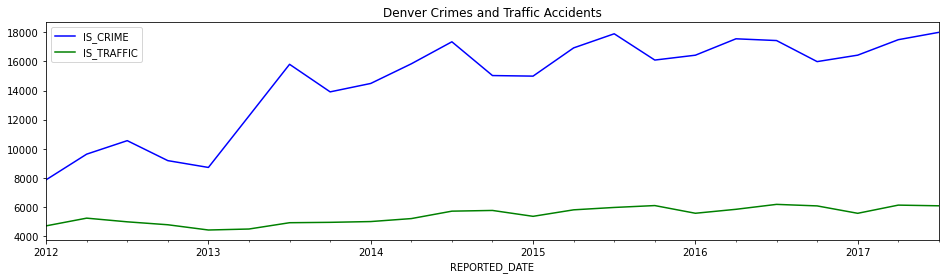

In [43]:
 crime_quarterly.plot(**plot_kwargs)

In [44]:
crime_sort.resample('Q').sum().head()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442


In [45]:
crime_sort.resample('QS-MAR')['IS_CRIME', 'IS_TRAFFIC'] \
 .sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2011-12-01,5013,3198
2012-03-01,9260,4954
2012-06-01,10524,5190
2012-09-01,9450,4777
2012-12-01,9003,4652


In [46]:
crime_begin = crime_quarterly.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

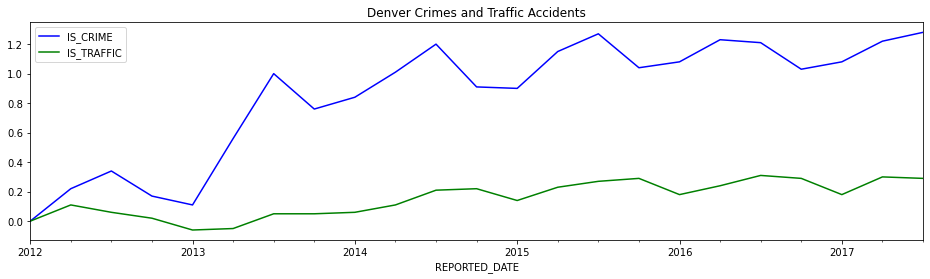

In [50]:
crime_quarterly.div(crime_begin).sub(1).round(2).plot(**plot_kwargs)